#By group of 2 students: 521K0126 Nguyen Duy Anh and 521K0133 La Gia Hiep

#Task 2:

Task 2: (7 points): Group work
Propose a prediction problem that can be solved using machine learning with the following requirements:
The number of Features/Attributes includes various types: categorical and numerical types.
The dataset was not used before in class.

Implement the following tasks:
1.   Perform statistical analysis on the data, create graphs to understand the data. Investigate the role of each feature on the problem's objective.
2.   Apply basic machine learning models to solve this problem, including Ensemble Learning methods.
3.   Use models of Feed Forward Neural Network and Recurrent Neural Network (or similar models) to solve this problem.
4.   Implement techniques to prevent Overfitting in the models from the task (2) and task (3).
5.   Once the model training is completed, please analyze the obtained result of one model (you can choose your self). How to improve the accuracy of this implemented models.

#  Predicting the Salary of AI/ML/Data Science Professionals

Here we use the newest updated public dataset taken from the https://ai-jobs.net/

That contains about 5,500 2020-2023 year gross salaris of Data domain professional. including Data Scientists, Data Engineers, Data Analysts, Data Managers, and many more.


Given the various attributes in the dataset, we can formulate a regression problem to predict the salary_in_usd of professionals in the AI/ML/Data Science field. This problem is interesting because it allows us to understand the factors that influence salaries in this industry and can provide insights for both job seekers and employers.
Features/Attributes:

  + work_year (Numerical)

  + experience_level (Categorical: EN, MI, SE, EX)

  + employment_type (Categorical: PT, FT, CT, FL)

  + job_title (Categorical)

  + employee_residence (Categorical)

  + remote_ratio (Numerical: 0, 50, 100)

  + company_location (Categorical)
  + company_size (Categorical: S, M, L)

Target Variable:

  + salary_in_usd (Numerical)


# Installing tensorflow (optional)





In [ ]:
!pip install tensorflow

# Read and process data

The project begins with reading the data and finding out some important details about it. We look at the number of unique values for each feature, the data size, the feature category and the data type.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/salaries.csv')

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,1,2,62,212000,82,0,72,1
1,2023,1,2,62,190000,82,0,72,1
2,2023,2,2,26,43064,31,0,27,1
3,2023,3,2,95,245700,82,0,72,1
4,2023,3,2,95,132300,82,0,72,1
...,...,...,...,...,...,...,...,...,...
5124,2020,3,2,68,412000,82,100,72,0
5125,2021,2,2,113,151000,82,100,72,0
5126,2020,0,2,68,105000,82,100,72,2
5127,2020,0,0,21,100000,82,100,72,0


In [ ]:
cols2drop = ['salary', 'salary_currency']
df = df.drop(cols2drop, axis=1)

In [ ]:
print(df.shape)


(8805, 9)


In [ ]:
#Checking num of unique value
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
work_year,4
experience_level,4
employment_type,4
job_title,124
salary_in_usd,1768
employee_residence,86
remote_ratio,3
company_location,74
company_size,3


In [ ]:
df


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EX,FT,Data Science Director,212000,US,0,US,M
1,2023,EX,FT,Data Science Director,190000,US,0,US,M
2,2023,MI,FT,Business Intelligence Engineer,43064,GB,0,GB,M
3,2023,MI,FT,Business Intelligence Engineer,43064,GB,0,GB,M
4,2023,SE,FT,Machine Learning Engineer,245700,US,0,US,M
...,...,...,...,...,...,...,...,...,...
8800,2020,SE,FT,Data Scientist,412000,US,100,US,L
8801,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
8802,2020,EN,FT,Data Scientist,105000,US,100,US,S
8803,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [ ]:
# Get the insights of each features
cat_cols = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
num_cols = ['work_year', 'remote_ratio']
target_col = ["salary_in_usd"]
print("The categorial cols are : ", cat_cols)
print("The numerical cols are : ", num_cols)
print("The target variable is :  ", target_col)
df.dtypes

The categorial cols are :  ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
The numerical cols are :  ['work_year', 'remote_ratio']
The target variable is :   ['salary_in_usd']


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

# Data cleaning and normalization

We apply the following steps to prepare the data for analysis. First, we remove any rows that have null or duplicate values. Second, we use Label Encoder to convert categorical data into numerical data. Third, we normalize the data to have a common scale. Finally, we split the data into train and test sets.

In [ ]:
# Check for null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
# Get and drop duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Convert categorical variables to numeric
le = LabelEncoder()
df['experience_level'] = le.fit_transform(df['experience_level'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['job_title'] = le.fit_transform(df['job_title'])
df['employee_residence'] = le.fit_transform(df['employee_residence'])
df['company_location'] = le.fit_transform(df['company_location'])
df['company_size'] = le.fit_transform(df['company_size'])


# Split the data into training and testing sets
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

# Scales numerical variables
numeric_columns = X.select_dtypes(include=['int', 'float']).columns
mm = MinMaxScaler()
X[numeric_columns] = mm.fit_transform(X[numeric_columns])
y = y.values.reshape(-1,1)
y = mm.fit_transform(y)
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,1.000000,0.333333,0.666667,0.504065,0.964706,0.0,0.986301,0.5
1,1.000000,0.333333,0.666667,0.504065,0.964706,0.0,0.986301,0.5
2,1.000000,0.666667,0.666667,0.211382,0.364706,0.0,0.369863,0.5
3,1.000000,1.000000,0.666667,0.772358,0.964706,0.0,0.986301,0.5
4,1.000000,1.000000,0.666667,0.772358,0.964706,0.0,0.986301,0.5
...,...,...,...,...,...,...,...,...
5124,0.000000,1.000000,0.666667,0.552846,0.964706,1.0,0.986301,0.0
5125,0.333333,0.666667,0.666667,0.918699,0.964706,1.0,0.986301,0.0
5126,0.000000,0.000000,0.666667,0.552846,0.964706,1.0,0.986301,1.0
5127,0.000000,0.000000,0.000000,0.170732,0.964706,1.0,0.986301,0.0


In [ ]:
y

array([0.32822338, 0.29156899, 0.04675767, ..., 0.14994977, 0.14161922,
       0.13273054])

In [ ]:
# Print the shapes of the training and testing sets to verify the split
print("Training set shapes - X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("Testing set shapes - X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))

Training set shapes - X_train: (4103, 8), y_train: (4103,)
Testing set shapes - X_test: (1026, 8), y_test: (1026,)


# 1) Perform statistical analysis on the data, create graphs to understand the data. Investigate the role of each feature on the problem's objective.

To explore the data and the relationships between the features and the target variable, we plotted some graphs and performed some statistical tests. Then, we applied a RandomForestRegressor model to estimate the importance of each feature in predicting the outcome. We used the feature_importances_ attribute of the model to rank the features by their contribution to the prediction.

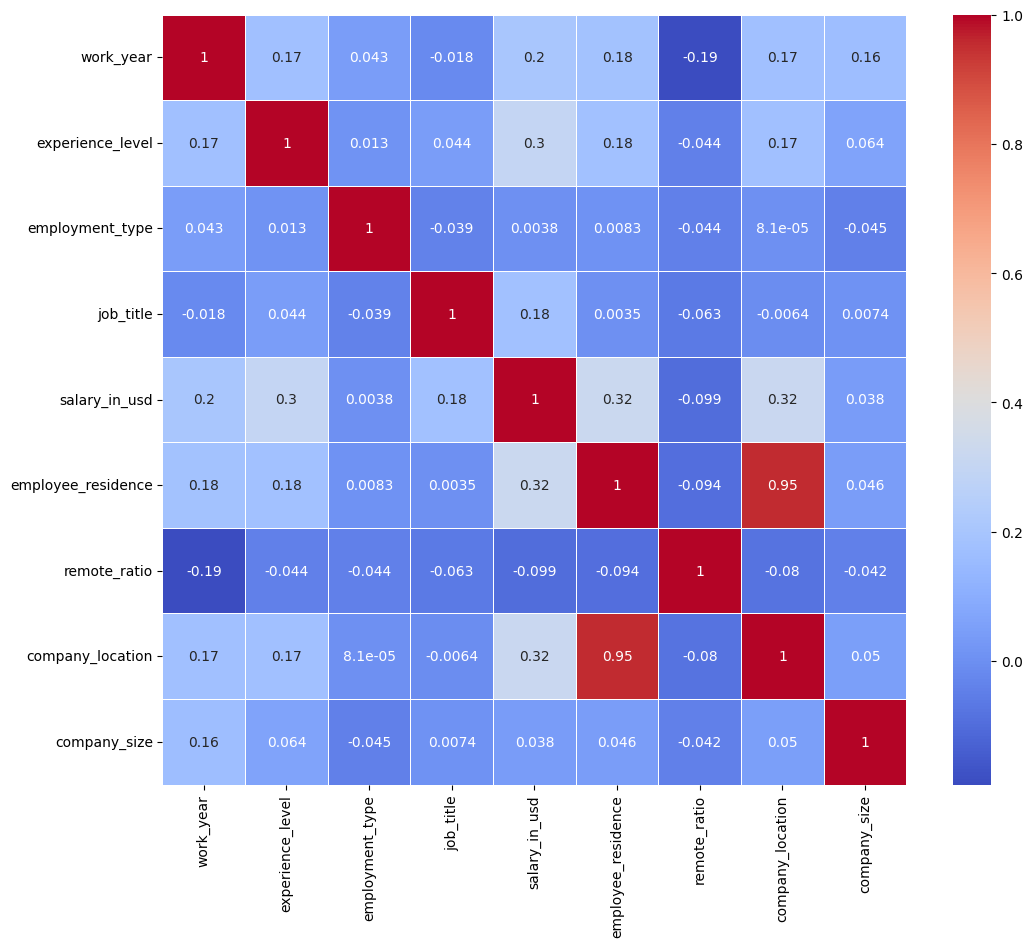

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.show()


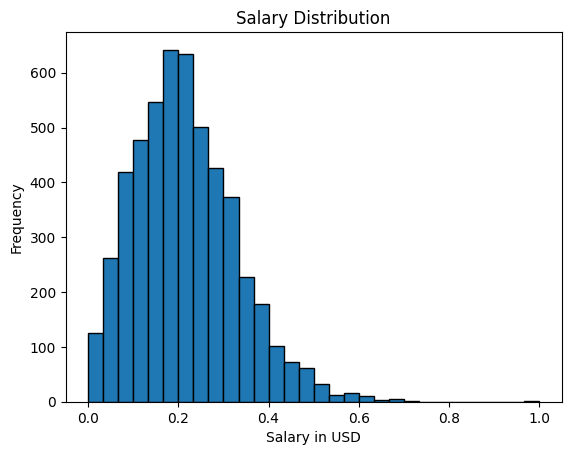

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for the salary
plt.hist(y, bins=30, edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
# Print feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))

              Feature  Importance
3           job_title    0.336277
4  employee_residence    0.310828
1    experience_level    0.166758
0           work_year    0.055182
5        remote_ratio    0.046457
6    company_location    0.036310
7        company_size    0.035394
2     employment_type    0.012795


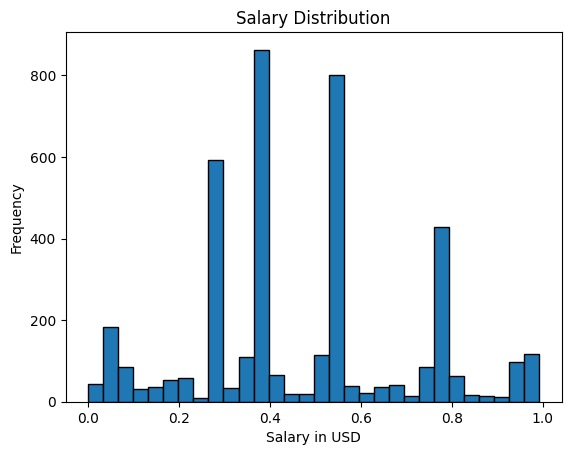

In [ ]:
# Create a histogram for the jobtitle
# plt.hist(y_train, bins=30, edgecolor='black')
plt.hist(X_train['job_title'], bins=30, edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

# 2) Machine learning models to solve this problem, including Ensemble Learning methods (Including Task 4, Implement techniques to prevent Overfitting)

We used different ML models (such as Linear Regression, Decision Tree, Random Forest, Gradient Boosting, etc.) to train and predict the data. Then we visualized the results to see how they compared. We also tried an ensemble model to optimize the predictions.

In [ ]:
X_train

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
1215,1.000000,1.000000,0.666667,0.016260,0.964706,1.0,0.986301,0.5
19,1.000000,1.000000,0.666667,0.341463,0.141176,1.0,0.150685,0.5
2093,1.000000,1.000000,0.666667,0.552846,0.964706,1.0,0.986301,0.5
668,1.000000,1.000000,0.666667,0.365854,0.964706,1.0,0.986301,0.5
218,1.000000,1.000000,0.666667,0.772358,0.964706,0.0,0.986301,0.5
...,...,...,...,...,...,...,...,...
4426,0.333333,0.000000,0.666667,0.764228,0.905882,1.0,0.945205,0.0
466,1.000000,0.333333,0.666667,0.642276,0.364706,1.0,0.369863,0.5
3092,1.000000,0.000000,0.666667,0.292683,0.964706,1.0,0.986301,0.5
3772,1.000000,1.000000,0.666667,0.365854,0.964706,1.0,0.986301,0.5


In [ ]:
X_test

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
4075,0.666667,1.000000,0.666667,0.552846,0.964706,1.0,0.986301,0.5
3181,1.000000,0.666667,0.666667,0.715447,0.964706,0.0,0.986301,0.0
1513,1.000000,1.000000,0.666667,0.780488,0.964706,0.0,0.986301,0.5
4318,0.666667,0.666667,0.666667,0.552846,0.964706,0.5,0.986301,0.0
3167,1.000000,1.000000,0.666667,0.772358,0.964706,1.0,0.986301,0.5
...,...,...,...,...,...,...,...,...
3027,1.000000,1.000000,0.666667,0.365854,0.964706,0.0,0.986301,0.5
2929,1.000000,1.000000,0.666667,0.365854,0.964706,1.0,0.986301,0.5
3976,0.666667,0.666667,0.666667,0.772358,0.964706,0.0,0.986301,0.5
4108,0.666667,1.000000,0.666667,0.528455,0.964706,0.0,0.986301,0.5


In [ ]:
y_train

array([0.22492465, 0.29156899, 0.22659076, ..., 0.1166276 , 0.18827026,
       0.29490121])

In [ ]:
y_test

array([0.21659411, 0.08830375, 0.25058272, ..., 0.19160248, 0.38737023,
       0.20826357])

In [ ]:
def plot_model_comparison(scores):
    scores_df = pd.DataFrame(scores).T
    for i, metric in enumerate(scores_df.columns, 1):
        plt.figure(figsize=(12, 8))  # Adjust the size as needed
        plt.subplot(2, 2, i)
        scores_df[metric].sort_values().plot(kind='barh', title=metric)
    plt.tight_layout()  # adjust subplot parameters to give specified padding
    plt.show()

Best parameters for Linear Regression: {'model__fit_intercept': False}
Linear Regression MSE: 0.010657574802034596
Linear Regression RMSE: 0.10323553071513022
Linear Regression MAE: 0.07774473497379501
Linear Regression R-squared (R2): 0.16538235069703888
Linear Regression RMSE/orgscale: 61962.068770751874 kUSD/year
Linear Regression Train MSE: 0.010006324469962163
Linear Regression Train RMSE: 0.10003161735152623
Linear Regression Train MAE: 0.077152548861639
Linear Regression Train R-squared (R2): 0.21652643493176515
Best parameters for Decision Tree: {'model__max_depth': 6}
Decision Tree MSE: 0.009511928552941747
Decision Tree RMSE: 0.09752911643679413
Decision Tree MAE: 0.07253847337111131
Decision Tree R-squared (R2): 0.25510037727547663
Decision Tree RMSE/orgscale: 58537.073214480275 kUSD/year
Decision Tree Train MSE: 0.007697791145699398
Decision Tree Train RMSE: 0.08773705685569466
Decision Tree Train MAE: 0.06666858701820445
Decision Tree Train R-squared (R2): 0.39727960149841

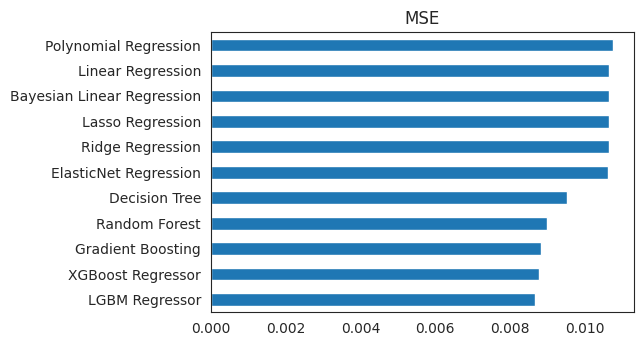

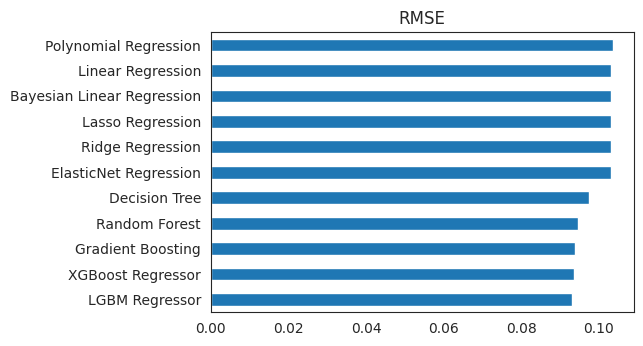

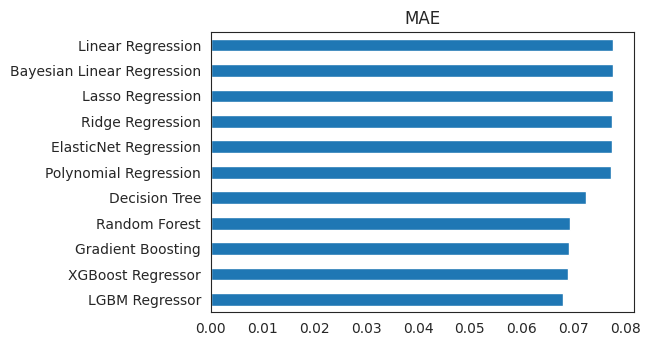

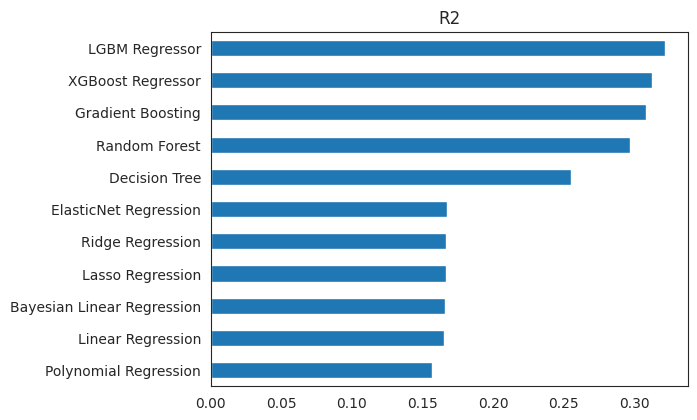

The best model is: LGBM Regressor


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

max_salary = 615201
min_salary = 15000
features = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size','work_year', 'remote_ratio']
best_scores = {}
# Define the models
models = [
    ('Linear Regression', LinearRegression(), {'model__fit_intercept': [True, False]}),
    ('Decision Tree', DecisionTreeRegressor(random_state=42), {'model__max_depth': range(1, 10)}),
    ('Random Forest', RandomForestRegressor(random_state=42), {'model__n_estimators': [10, 50, 100, 200], 'model__max_depth': [10, 20, 30]}),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42), {'model__n_estimators': [10, 50, 100, 200], 'model__learning_rate': [0.01, 0.1, 1]}),
    ('Ridge Regression', Ridge(), {'model__alpha': [0.1, 1.0, 10.0]}),
    ('Lasso Regression', Lasso(random_state=42), {'model__alpha': [0.0001, 1.0, 10.0]}),
    ('Polynomial Regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression()), {'model__polynomialfeatures__degree': [2, 3, 4]}),
    ('ElasticNet Regression', ElasticNet(), {'model__alpha': [0.0001, 0.001, 0.01], 'model__l1_ratio': [0.1, 0.5, 0.9]}),
    ('LGBM Regressor', LGBMRegressor(force_row_wise=True, verbose=-1), { 'model__n_estimators': [50, 100, 200],'model__learning_rate': [0.01, 0.1, 0.2],}),
    ('XGBoost Regressor', XGBRegressor(), {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.2]}),
    ('Bayesian Linear Regression', BayesianRidge(), {})
]

# Define a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), features),
    ])

#For bar plot
scores = {}
rmse_scores = {}

# Train and evaluate each model
for name, model, params in models:
    # Create a pipeline
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

    # Perform grid search
    grid = GridSearchCV(pipe, param_grid=params, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)

    # Print best parameters
    print(f'Best parameters for {name}: {grid.best_params_}')

    # Make predictions on the test set using the best model
    best_model = grid.best_estimator_
    predictions = best_model.predict(X_test)
    predictions_train = best_model.predict(X_train)

    # Evaluate the model on test set
    mse = mean_squared_error(y_test, predictions)
    print(f'{name} MSE: {mse}')
    rmse = sqrt(mse)
    print(f'{name} RMSE: {rmse}')
    mae = mean_absolute_error(y_test, predictions)
    print(f'{name} MAE: {mae}')
    r2 = r2_score(y_test, predictions)
    print(f'{name} R-squared (R2): {r2}')
    best_scores[name] = grid.best_score_
    rmse_kusd = rmse * (max_salary - min_salary)  # Convert RMSE back to original scale
    print(f'{name} RMSE/orgscale: {rmse_kusd} kUSD/year')

    # Evaluate the model on the training set
    mse_train = mean_squared_error(y_train, predictions_train)
    print(f'{name} Train MSE: {mse_train}')
    rmse_train = sqrt(mse_train)
    print(f'{name} Train RMSE: {rmse_train}')
    mae_train = mean_absolute_error(y_train, predictions_train)
    print(f'{name} Train MAE: {mae_train}')
    r2_train = r2_score(y_train, predictions_train)
    print(f'{name} Train R-squared (R2): {r2_train}')
    #Bar plot
    scores[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2' : r2}
    rmse_scores[name] = rmse

plot_model_comparison(scores)
best_model_name = max(best_scores, key=best_scores.get)
print(f'The best model is: {best_model_name}')

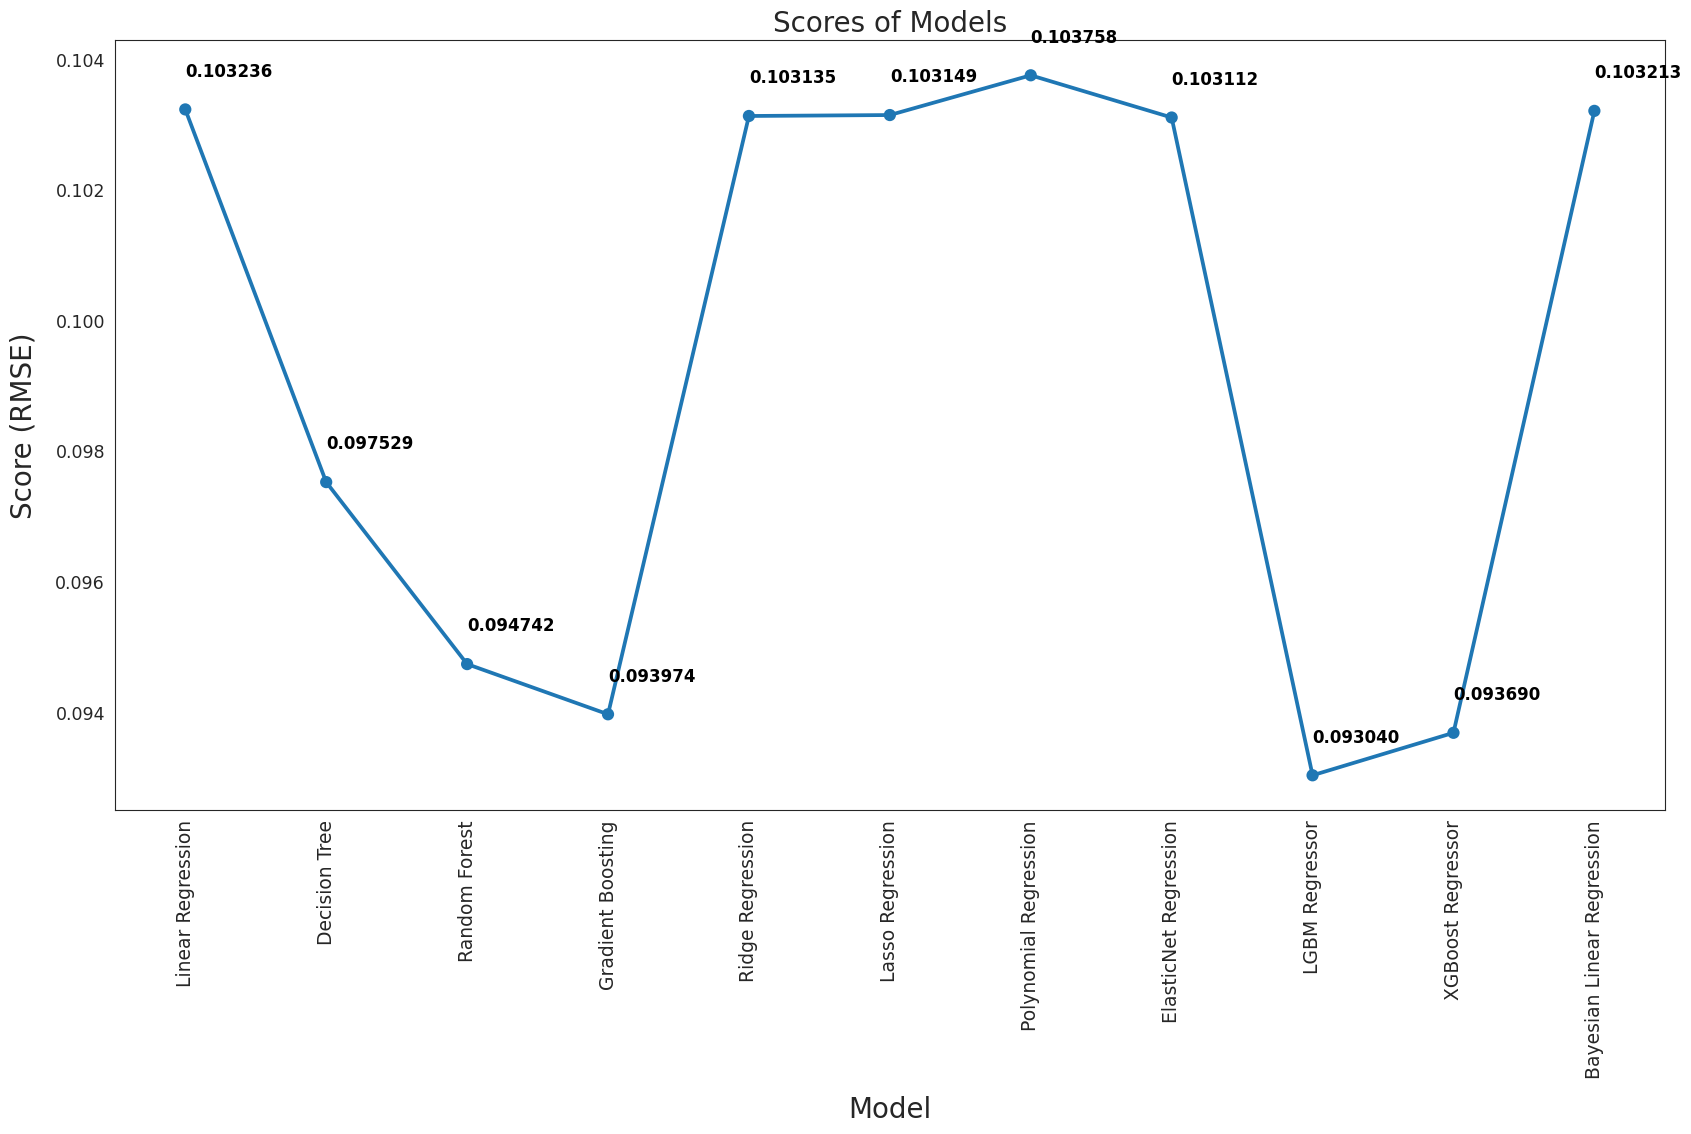

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("white")

# Create a figure
fig = plt.figure(figsize=(20, 10))

# Create a point plot
ax = sns.pointplot(x=list(rmse_scores.keys()), y=list(rmse_scores.values()), markers=['o'], linestyles=['-'])

# Add the scores to the plot
for i, score in enumerate(rmse_scores.values()):
    ax.text(i, score + 0.0005, '{:.6f}'.format(score), horizontalalignment='left', size='large', color='black', weight='semibold')

# Set the labels and title
plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5, rotation=90)  # Rotate x-axis labels
plt.tick_params(axis='y', labelsize=12.5)
plt.title('Scores of Models', size=20)

# Show the plot
plt.show()


In [ ]:
#Ensemble learning method / stack models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer



# Define the individual models
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=50, random_state=1)
model3 = GradientBoostingRegressor(random_state=1)

# Create an ensemble model
ensemble = VotingRegressor([('Linear Regression', model1),
                            ('Random Forest', model2),
                            ('Gradient Boosting', model3)])

# Fit the ensemble model
ensemble.fit(X_train, y_train)

# Make predictions
predictions = ensemble.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f'RMSE: {rmse}')

Mean Squared Error (MSE): 0.008909723009256397
Mean Absolute Error (MAE): 0.06979030309699064
R-squared (R2): 0.3022603911251498
RMSE: 0.09439132909995704


# 3) Neural Network (Inlcuding Task 4, implement techniques to prevent Overfitting)


We used different types of neural networks to build our model, such as feed-forward neural networks (FFNN) and recurrent neural networks (RNN). To avoid overfitting, we implemented some techniques like early stopping, model checkpointing, and feature selection. These methods help us to stop the training when the validation loss stops decreasing, save the best model parameters, and reduce the number of input features respectively.

##FFNN

In [ ]:
mse_score = []
mse_name = []

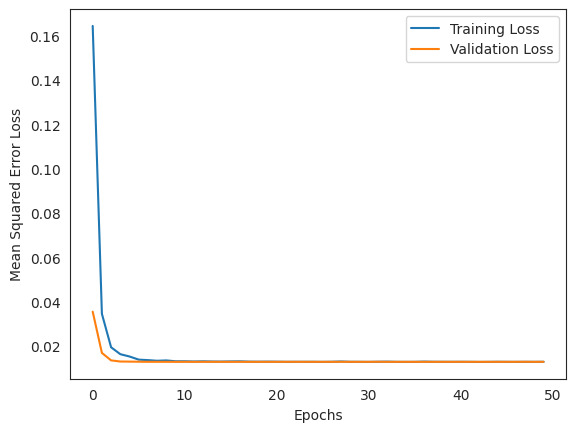

33/33 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 0.012775146170204978
Mean Absolute Error (MAE): 0.08759388450949193
R-squared (R2): -0.00044922640774669453
RMSE: 0.11302719217164062


In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(2, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),verbose = 0)

# Plot training and validation loss to visualize overfitting
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f'RMSE: {rmse}')

mse_score.append(mse)
mse_name.append("FFNN")

## FFNN prevent Overfitting with traceback


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


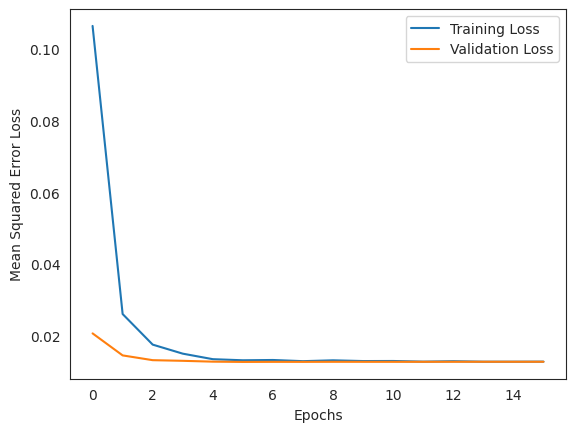

33/33 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.012719166413943965
Mean Absolute Error (MAE): 0.08732261492844699
R-squared (R2): 0.0039346689387068645
RMSE: 0.1127792818470838


In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(2, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Define early stopping callback to stop training when overfitting occurs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define model checkpoint callback to save the best model during training
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, model_checkpoint],verbose=0)
#2 callbacks are defined. EarlyStopping to stops the training process if model doesn't improve after 10 epochs
#model_checkpoint to save the model weights at each epoch if the model's performance on the validation set has improved
# Plot training and validation loss to visualize overfitting
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

# Load the best model saved by ModelCheckpoint
best_model = load_model('best_model.h5')

# Make predictions
predictions = best_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f'RMSE: {rmse}')

mse_score.append(mse)
mse_name.append("FFNN-Prevent Overfitting")

## RNN


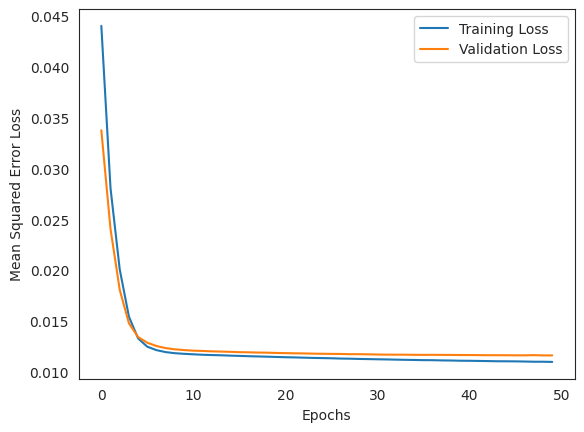

33/33 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.011606441975915854
Mean Absolute Error (MAE): 0.08256201281703045
R-squared (R2): 0.09107451754776252
RMSE: 0.10773319811421107


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the model
model = Sequential() #Allows us to create neural network by stacking layers on top of each other
model.add(SimpleRNN(8,activation='relu', input_shape=(X_train.shape[1], 1)))  # RNN layer
model.add(Dense(4, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32, verbose=0)

# Plot training and validation loss to visualize overfitting
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f'RMSE: {rmse}')

mse_score.append(mse)
mse_name.append("RNN")

## LSTM

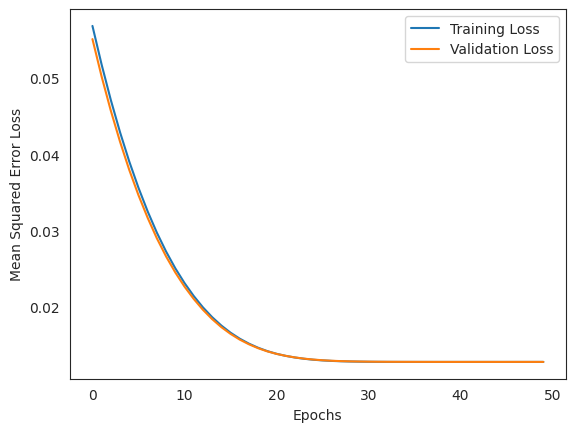

33/33 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.012773064772935954
Mean Absolute Error (MAE): 0.08763409396209867
R-squared (R2): -0.00028622770229924654
RMSE: 0.11301798428982864


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Define the model
model = Sequential() #Allows us to create neural network by stacking layers on top of each other
model.add(LSTM(8,activation='relu', input_shape=(X_train.shape[1], 1)))  # LSTM layer
model.add(Dense(4, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32, verbose=0)

# Plot training and validation loss to visualize overfitting
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f'RMSE: {rmse}')

mse_score.append(mse)
mse_name.append("LSTM")


## Feature Selection Overfitting for RNN

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor
estimator = RandomForestRegressor()

# Create RFE model and select the number of features you want to keep
rfe = RFE(estimator, n_features_to_select=4)  # Adjust the number as needed

# Fit the RFE model and transform the data
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

In [ ]:
X_train_selected.shape

(4103, 4)

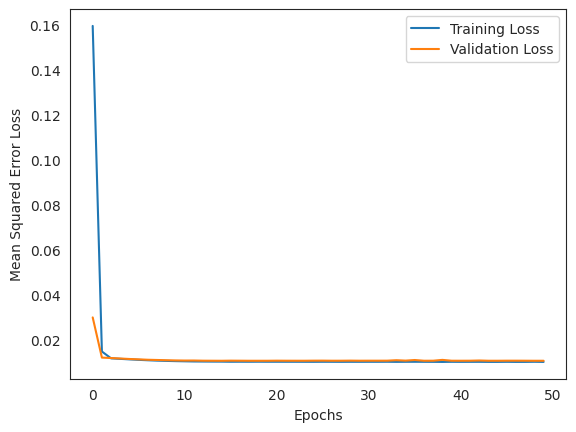

33/33 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.010670495596439799
Mean Absolute Error (MAE): 0.07802289126410497
R-squared (R2): 0.1643704954434836
RMSE: 0.10329809096222349


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Define the model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train_selected.shape[1], 1)))  # RNN layer
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1))  # Output layer

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model
history = model.fit(X_train_selected, y_train, validation_data=(X_test_selected, y_test),epochs=50, batch_size=32, verbose=0)

# Plot training and validation loss to visualize overfitting
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test_selected)

# Evaluate the model
rfe_mse = mean_squared_error(y_test, predictions)
rfe_mae = mean_absolute_error(y_test, predictions)
rfe_r2 = r2_score(y_test, predictions)
rfe_rmse = sqrt(rfe_mse)
print(f'Mean Squared Error (MSE): {rfe_mse}')
print(f'Mean Absolute Error (MAE): {rfe_mae}')
print(f'R-squared (R2): {rfe_r2}')
print(f'RMSE: {rfe_rmse}')

mse_score.append(rfe_mse)
mse_name.append("RNN with Feature Selection")

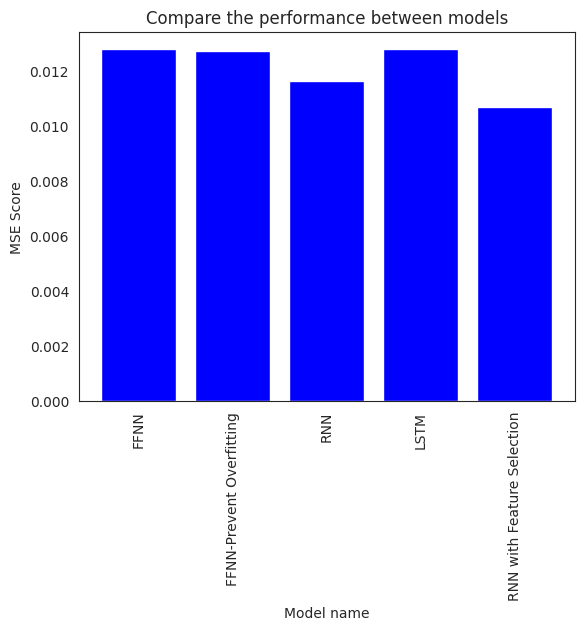

In [ ]:
plt.bar(mse_name, mse_score, color='blue')
plt.xlabel("Model name")
plt.ylabel("MSE Score")
plt.title("Compare the performance between models")
plt.xticks(rotation='vertical')
plt.show()

# 5) Improve the chosen model (LGBM Regressor)


So we will be choosing the LGBM Regressor model for further analysis and improvement. We aimed to achieve a higher score by optimizing the model parameters and reducing the feature space.

From analyzing the result obtained form the training from task 2, here is our analysis:

+ Best parameters: The best parameters for your LGBM Regressor are a learning rate of 0.1 and 50 estimators. These parameters were found to give the best performance during the grid search.

+ Mean Squared Error (MSE): The MSE for the test set is approximately 0.0087, and for the training set, it’s approximately 0.0069. The lower the MSE, the better the model’s performance. The fact that the MSE is lower for the training set suggests that the model is fitting the training data better than the test data.

+ Root Mean Squared Error (RMSE): The RMSE for the test set is approximately 0.093, and for the training set, it’s approximately 0.083. Like MSE, a lower RMSE indicates better performance. The difference between the training and test RMSE suggests that the model might be overfitting to the training data.

+ Mean Absolute Error (MAE): The MAE for the test set is approximately 0.068, and for the training set, it’s approximately 0.063. A lower MAE indicates better performance. The difference between the training and test MAE, like with RMSE, suggests possible overfitting.

+ R-squared (R2): The R2 score for the test set is approximately 0.322, and for the training set, it’s approximately 0.463. An R2 score of 1 indicates that the model perfectly predicts the target variable, so these scores suggest there is room for improvement in the model’s predictive ability.

This means that while the model perfoms well on the training data, it doesn't generalize as well to new, unseen data. We will try to improve this by trying several techniques to obtained the best result possible. Our goal is to increase the R2 score

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from datetime import datetime

max_salary = 615201
min_salary = 15000
# Define the model and parameters
#dart stand for Dropouts meet Multiple Additive Regression Trees
#Can add n_estimators=50
model = LGBMRegressor(random_state=42, verbose=-1)
params = {
    'model__n_estimators': [300], #Number of boosted trees to fit
    'model__learning_rate': [0.1, 0.2, 0.05], #Boosint learning rate, determines the impact of each tree on the final outcome
    'model__num_leaves': [62], # Maximum number of leaves (terminal nodes) that can be created
    'model__boosting_type': ['dart'], #can use randomforest, or gradientboosint,but according to the documentation on a high level dart seems to be the most accurate way of boosting
    'model__objective': ['regression'], #regression, specifies learning task and the corresponding learning objective
    'model__subsample': [0.8],          # Fraction of samples used for training each tree
    'model__colsample_bytree': [0.8],   # Fraction of features used for training each tree
    'model__min_child_samples': [20],   # Minimum number of data needed in a child (leaft node)
    'model__max_depth': [10], # Maximum tree depth for base learners
    'model__reg_alpha': [1e-2],  # L1 regularization term on weights,  L1 regularization tends to lead to sparse solutions, where some of the feature weights are exactly zero,
    'model__reg_lambda': [1e-2] # L2 regularization term on weights, L2 regularization tends to spread the weights more evenly among the features 0.01 and 0.001
    #prevent overfitting by adding penalty for complexity in loss function
}

features = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size','work_year', 'remote_ratio']

# Define a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), features),
    ])
# Create a pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', model)])
start_time = datetime.now()  # Start time

# Perform grid search
grid = GridSearchCV(pipe, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

end_time = datetime.now()  # End time
print(f'Duration: {end_time - start_time}')  # Print the running time
# Print best parameters
print(f'Best parameters for Random Forest: {grid.best_params_}')

# Make predictions on the test set using the best model
best_model = grid.best_estimator_
predictions = best_model.predict(X_test)
predictions_train = best_model.predict(X_train)

# Evaluate the model on test set
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')
rmse = sqrt(mse)
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2): {r2}')
# best_scores[name] = grid.best_score_
rmse_kusd = rmse * (max_salary - min_salary)  # Convert RMSE back to original scale
print(f'RMSE/orgscale: {rmse_kusd} kUSD/year')

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, predictions_train)
print(f'MSE train: {mse_train}')
rmse_train = sqrt(mse_train)
print(f'RMSE train: {rmse_train}')
mae_train = mean_absolute_error(y_train, predictions_train)
print(f'MAE train: {mae_train}')
r2_train = r2_score(y_train, predictions_train)
print(f'R-squared (R2) train: {r2}')
rmse_kusd_train = rmse_train * (max_salary - min_salary)  # Convert RMSE back to original scale
print(f'RMSE/orgscale train: {rmse_kusd_train} kUSD/year')


Duration: 0:00:32.097650
Best parameters for Random Forest: {'model__boosting_type': 'dart', 'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__min_child_samples': 20, 'model__n_estimators': 300, 'model__num_leaves': 62, 'model__objective': 'regression', 'model__reg_alpha': 0.01, 'model__reg_lambda': 0.01, 'model__subsample': 0.8}
MSE: 0.00871742589477243
RMSE: 0.09336715640294733
MAE: 0.06742400601604849
R-squared (R2): 0.31731959255132325
RMSE/orgscale: 56039.060640205396 kUSD/year
MSE train: 0.006696909918806035
RMSE train: 0.08183464986670398
MAE train: 0.060983253685886
R-squared (R2) train: 0.31731959255132325
RMSE/orgscale train: 49117.2386846456 kUSD/year


After many testing and modification, it seems our new LGBM Regressor model wasn't able to improve much from the original model.